In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
all_stroke_data = 'dataset/healthcare-dataset-stroke-data.csv'
stroke_df = pd.read_csv(all_stroke_data)
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
# drop rows with empty data points
clean_file = stroke_df.dropna(how = 'any')
clean_file = clean_file[clean_file.gender != "Other"]
clean_file = clean_file[clean_file.age >= 20]
clean_file 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
# gave columns more meaningful names
clean_file = clean_file.rename(columns={"id":"ID", "gender":"Gender", "age":"Age", "hypertension":"Hypertension", "heart_disease":"HeartDisease", "ever_married":"EverMarried", "work_type":"WorkType", "Residence_type":"ResidenceType", "avg_glucose_level":"AvgGlucoseLevel", "bmi":"BMI", "smoking_status":"SmokingStatus", "stroke":"Stroke"})
clean_file

,ID,Gender,Age,Hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,BMI,SmokingStatus,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
numbered_file = clean_file
Gender = {'Male': 1,'Female': 2}
numbered_file.Gender = [Gender[item] for item in numbered_file.Gender]
EverMarried = {'Yes': 1,'No': 0}
numbered_file.EverMarried = [EverMarried[item] for item in numbered_file.EverMarried]
WorkType = {'children': 1,'Govt_job': 2, 'Never_worked': 3, 'Private': 4, 'Self-employed': 5}
numbered_file.WorkType = [WorkType[item] for item in numbered_file.WorkType]
ResidenceType = {'Rural': 1,'Urban': 2}
numbered_file.ResidenceType = [ResidenceType[item] for item in numbered_file.ResidenceType]
SmokingStatus = {'formerly smoked': 1,'never smoked': 2, 'smokes': 3, 'Unknown': 4}
numbered_file.SmokingStatus = [SmokingStatus[item] for item in numbered_file.SmokingStatus]
numbered_file

,ID,Gender,Age,Hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,BMI,SmokingStatus,Stroke
0,9046,1,67.0,0,1,1,4,2,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,4,1,105.92,32.5,2,1
3,60182,2,49.0,0,0,1,4,2,171.23,34.4,3,1
4,1665,2,79.0,1,0,1,5,1,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,4,2,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,2,57.0,0,0,1,4,1,77.93,21.7,2,0
5106,44873,2,81.0,0,0,1,5,2,125.20,40.0,2,0
5107,19723,2,35.0,0,0,1,5,1,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,4,1,166.29,25.6,1,0


In [21]:
#clean_file.to_csv(r'C:\Users\garre\OneDrive\Desktop\strokepredictor\dataset\cleanedstrokedata.csv', encoding='utf-8', index=False)

In [22]:
X = numbered_file[["Gender", "Age", "Hypertension", "HeartDisease", "EverMarried", "WorkType", "ResidenceType", "AvgGlucoseLevel", "BMI", "SmokingStatus"]]
y = numbered_file["Stroke"].values.reshape(-1, 1)
print(X.shape)

(3964, 10)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [26]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.06786184798725114
Testing Score: 0.07535866531262858


Text(0.5, 1.0, 'Residual Plot')

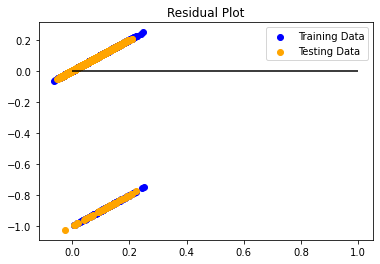

In [27]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")